## 14-1 들어가며
   
### 전처리는 왜 중요할까?
___

전처리에 따라 데이터 분석의 질이 변화된다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("👽 Hello.")

👽 Hello.


In [2]:
import os

csv_file_path = os.getenv("HOME") + '/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


### 학습 목표
___
- 중복된 데이터를 제거할 수 있고, 결측치를 제거하거나 채워 넣을 수 있다.
- 데이터를 정규화시킬 수 있다.
- 이상치(outlier)를 찾고, 이를 처리 할 수 있다.
- 범주형 데이터를 원-핫 인코딩 할 수 있다.
- 연속적인 ㄷ이터를 구간으로 나눠 범주형 데이터로 변환 할 수 있다.
   
      
   
   
   ### 배울 내용
___
1. 결측치
2. 중복된 데이터
3. 이상치
4. 정규화
5. 원-핫 인코딩
6. binning

### 14-2 결측치(Missing Data)

1. 결측치가 있는 데이터를 제거한다
2. 결측치를 어떤 값으로 대체한다.
    - 결측치를 대체하는 방법은 데이터마다 특성을 반영하여 해결
    
결측치 여부를 먼저 확인

In [3]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [4]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()  # trade의 전체 갯수 에서 각 컬럼별 결측 값을 확인

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [5]:
df = trade.copy()

In [6]:
df = df.drop('기타사항', axis = 1)
df

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [8]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [9]:
df[df.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


- index 191 데이터는 특정 값으로 대체
- index 196,197,198 는 삭제
- DataFrame 의 dropna 는 결측치를 삭제해주는 메서드
- subset 옵션으로 특정 컬럼 |선택
- how 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 'all'을 선택
- inplace 옵션으로 해당 DataFrame 내부에 바로 적용

In [10]:
df.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [11]:
df[df.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


### 데이터 대체 방법
1. 특정 값 지정 (결측치가 많은 경우, 데이터의 분산이 실제보다 작아지는 문제 발생)
2. 평균, 중앙값 등으로 대체 (결측치가 많은 경우, 데이터의 분산이 실제보다 작아지는 문제 발생)
3. 다른 데이터를 이용해 예측값으로 대체 (ex. 머신러닝 모델로 2020년 4월 미국의 예측값 생성, 이 값으로 결측치 보완)
4. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체 ex. 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완

In [12]:
df.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [13]:
df.loc[191,'수출금액'] = (df.loc[188, '수출금액'] + df.loc[194,'수출금액'])/2
df.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [14]:
df.loc[191,'무역수지'] = (df.loc[188,'무역수지'] + df.loc[194,'무역수지'])/2
df.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5


### 14-3 중복된 데이터

In [15]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Length: 199, dtype: bool

In [16]:
df[df.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [17]:
df[(trade['기간']=='2020년 03월') & (trade['국가명']=='중국')]

/home/jaejin/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [18]:
df.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


### DataFrame.drop_duplicates 에 대해 알아보자

In [19]:
# df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
#                    'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
# df

In [20]:
# df.drop_duplicates(subset=['id'], keep='last')

## 14-4 이상치(Outlier)

- 이상치 삭제
- 이상치 다른 값으로 대체
- 예측 모델을 만들어 예측값을 활용
- binning을 통해 수치형 데이터를 범주형으로 변경

### z-score method
___


In [21]:
def outlier(df,col,z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [22]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN
...,...,...,...,...,...,...,...,...
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0,NaN
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
trade.loc[outlier(trade,'무역수지',1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0,NaN
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0,NaN
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0,NaN
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0,NaN
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0,NaN
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0,NaN
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0,NaN
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0,NaN
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0,NaN
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0,NaN


In [24]:
trade.loc[outlier(trade, '무역수지',2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0,NaN
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0,NaN


In [25]:
def not_outlier(df,col,z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<=z].index

In [26]:
trade.loc[not_outlier(trade,'무역수지',1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN
...,...,...,...,...,...,...,...,...
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0,NaN
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0,NaN
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0,NaN


In [27]:
trade = trade.drop('기타사항', axis=1)

### IQR method
___

In [28]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8,10,-3,-5])))
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

<function matplotlib.pyplot.show(close=None, block=None)>

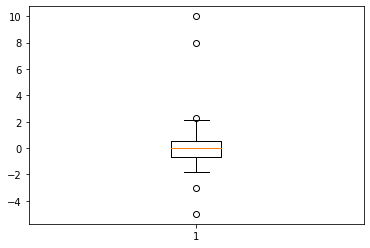

In [29]:
fig, ax =plt.subplots()
ax.boxplot(data)
plt.show

In [30]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [31]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [32]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)].index

outlier2(trade, '무역수지')

Int64Index([], dtype='int64')

## 14-5 정규화(Normalization)

In [33]:
np.random.seed(2020)
x = pd.DataFrame({'A':np.random.randn(100)*4 + 4,
                 'B':np.random.randn(100)-1})
x

,A,B
0,-3.075383,-0.448552
1,4.302209,-2.151012
2,-0.522519,-1.245304
3,1.394279,-1.169169
4,0.427537,-0.458080
...,...,...
95,13.250265,-0.734271
96,0.137697,-2.041710
97,2.614901,-3.057545
98,7.866735,-2.140529


In [35]:
x_standardization = (x-x.mean())/x.std()
x_standardization

,A,B
0,-1.862058,0.559307
1,0.072383,-1.132240
2,-1.192684,-0.232338
3,-0.690090,-0.156691
4,-0.943575,0.549839
...,...,...
95,2.418607,0.275419
96,-1.019573,-1.023639
97,-0.370038,-2.032961
98,1.007019,-1.121824


In [36]:
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.012283,0.607216
1,0.458634,0.267692
2,0.166733,0.448318
3,0.282702,0.463502
4,0.224213,0.605316
...,...,...
95,1.000000,0.550235
96,0.206677,0.289490
97,0.356550,0.086901
98,0.674291,0.269782


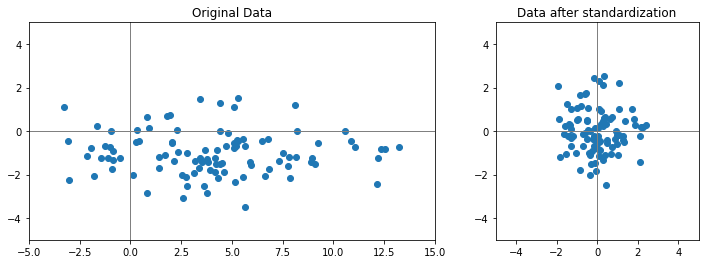

In [41]:
fig, axs = plt.subplots(1,2, figsize=(12,4),
                       gridspec_kw={'width_ratios':[2,1]})

axs[0].scatter(x['A'],x['B'])
axs[0].set_xlim(-5,15)
axs[0].set_ylim(-5,5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'],x_standardization['B'])
axs[1].set_xlim(-5,5)
axs[1].set_ylim(-5,5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title("Data after standardization")

plt.show()

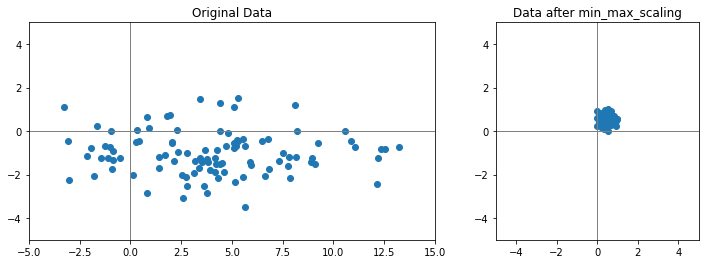

In [42]:
fig, axs = plt.subplots(1,2, figsize=(12,4),
                       gridspec_kw={'width_ratios':[2,1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5,15)
axs[0].set_ylim(-5,5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'],x_min_max['B'])
axs[1].set_xlim(-5,5)
axs[1].set_ylim(-5,5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min_max_scaling')

plt.show()

In [43]:
cols = ['수출건수','수출금액','수입건수','수입금액','무역수지']
trade_Standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.016301,1.389072,-0.163573,1.269146,1.254295
1,-0.694577,-0.258272,0.414021,-0.968522,0.399240
2,-0.852320,-1.094329,-0.995248,-0.868388,-1.099277
3,-0.424298,0.844460,-0.577434,0.693463,0.830261
4,-0.769827,-0.394729,0.147118,-1.278970,0.436171


In [44]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.960000e+02,1.950000e+02,1.960000e+02,1.960000e+02,1.950000e+02
mean,-1.620019e-16,-6.262797e-17,7.590300e-17,5.890979e-17,5.010237e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.236100e-01,-1.234557e+00,-1.000554e+00,-1.278970e+00,-1.605143e+00
25%,-5.973449e-01,-1.044645e+00,-7.687917e-01,-7.950137e-01,-1.118259e+00
50%,-4.405756e-01,-1.621527e-01,-3.428718e-01,-4.141340e-01,1.670773e-01
75%,4.325167e-01,1.029076e+00,3.917528e-01,8.920129e-01,7.442358e-01
max,5.449186e+00,2.066733e+00,3.247782e+00,2.356507e+00,2.431787e+00


In [45]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다.
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max() - trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [48]:
train = pd.DataFrame([[10,-10],[30,10],[50,0]])
test = pd.DataFrame([[0,1],[10,10]])

In [53]:
train_min = train.min()
train_max = train.max()

train_min_max = (train- train_min)/(train_max-train_min)
test_min_max = (test - train_min)/(train_max-train_min) # test를 min-max scaling 할 때

In [54]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [55]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


In [56]:
from sklearn.preprocessing import MinMaxScaler
train = [[10,-10],[30,10],[50,0]]
test = [[0,1]]
scaler = MinMaxScaler()

In [57]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [59]:
scaler.transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [61]:
# trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [62]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [63]:
print(trade['국가명'].head())

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


In [64]:
country = pd.get_dummies(trade['국가명'])
country.head()

,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [65]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0,1,0,0


In [71]:
trade.drop(country, axis=1)
trade_1 = trade.copy()

In [72]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2020년 05월,미국,0.162527,0.222220,0.835972,0.175552,0.325028,1,0,0,1,0,0
195,2020년 05월,일본,0.245869,0.007806,0.041081,0.014238,0.153985,0,1,0,0,1,0
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,1
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0


## 14-7 구간화(Binning)



In [73]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

👽 Almost there..


<AxesSubplot:>

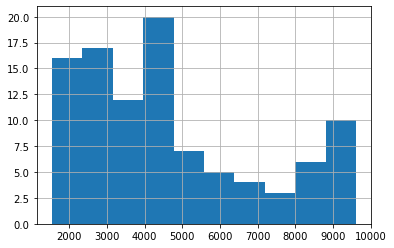

In [74]:
salary.hist()

In [75]:
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [76]:
ctg = pd.cut(salary, bins=bins)

In [77]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리 (4000, 6000]


In [78]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

bins 옵션을 정해주면 해당 정수만큼 균등하게 나눠준다

In [79]:
ctg = pd.cut(salary, bins = 6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [80]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

qcut은 구간을 일정하게 나누느 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠준다

In [81]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [83]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64
.
.
🛸 Well done!
